In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/Live-coding-alura-keras/refs/heads/main/autenticacao_notas.csv"

url_novos = "https://raw.githubusercontent.com/alura-cursos/Live-coding-alura-keras/refs/heads/main/novas_notas.csv"

dados = pd.read_csv(url)

x = dados[["Variância", "Assimetria", "Curtose", "Entropia"]]

y = dados["Classe"]

##Separando os dados:##

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 3478

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.2, random_state=SEED,stratify=y)

print(treino_x["Variância"])
print(treino_x["Variância"].mean())
print(treino_x["Variância"].std())

modelo = LinearSVC()

modelo.fit(treino_x, treino_y)

previsao = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsao) * 100

print(f"A taxa de acertos do modelo foi de {acuracia:.2f}%")

293     1.93400
737     4.15420
1168   -0.34890
601     2.55810
470     0.87256
         ...   
721    -0.45062
706     3.58290
253     5.28680
1060   -0.11716
1063   -3.60120
Name: Variância, Length: 1096, dtype: float64
0.4288213391423357
2.85317439603521
A taxa de acertos do modelo foi de 98.91%


##Normalização dos dados:

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

treino_x = scaler.fit_transform(treino_x)

print(treino_x)

teste_x = scaler.transform(teste_x)

[[ 0.5277861  -0.32043992  0.78532892  0.38889516]
 [ 1.30629216  0.93311211 -0.91167727 -0.026903  ]
 [-0.27270551  0.22968279 -1.12781134 -0.96975088]
 ...
 [ 1.70343475  0.24072691 -0.65465737  1.10869044]
 [-0.19144662 -0.21633416 -0.42515919  0.52296896]
 [-1.41311415 -1.44705893  2.11345513  0.31722477]]


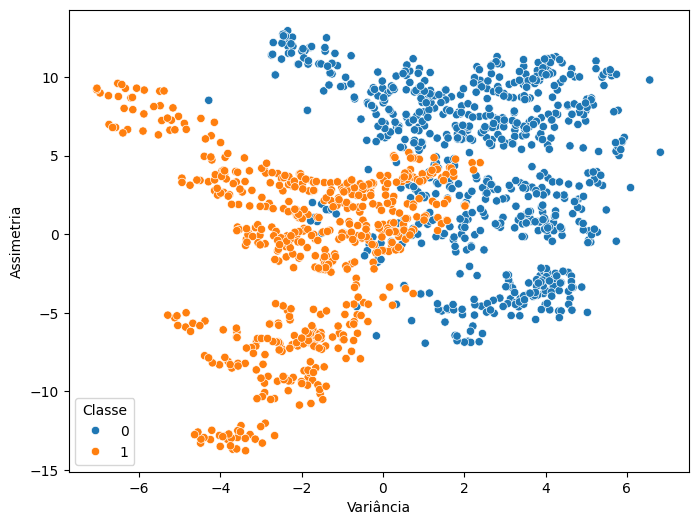

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=dados["Variância"],y=dados["Assimetria"], hue=dados["Classe"])
plt.legend(title="Classe")
plt.show()

In [5]:
import tensorflow as tf

modelo = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (treino_x.shape[1],)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
modelo.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [7]:
historico = modelo.fit(treino_x, treino_y, epochs=15, validation_split=0.2)

Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5470 - loss: 0.6426 - val_accuracy: 0.6000 - val_loss: 0.5992
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6414 - loss: 0.5741 - val_accuracy: 0.7455 - val_loss: 0.5471
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8052 - loss: 0.5313 - val_accuracy: 0.8136 - val_loss: 0.5024
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8977 - loss: 0.4618 - val_accuracy: 0.8727 - val_loss: 0.4616
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9057 - loss: 0.4304 - val_accuracy: 0.9182 - val_loss: 0.4216
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9470 - loss: 0.3849 - val_accuracy: 0.9409 - val_loss: 0.3745
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9587 - loss: 0.3241 - val_accuracy: 0.9545 - val_loss: 0.3238
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9607 - loss: 0.2934 - val_accuracy: 0.9591 - val_loss

In [8]:
modelo.evaluate(teste_x, teste_y)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9636 - loss: 0.0838 


[0.07354938983917236, 0.974452555179596]

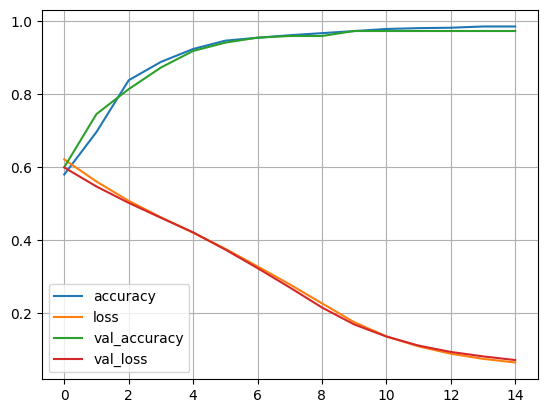

In [9]:
pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

In [15]:
novos_dados = pd.read_csv(url_novos)
novos_dados_normalizados = scaler.transform(novos_dados)
previsao = modelo.predict(novos_dados_normalizados)
print(novos_dados_normalizados)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[ 0.63873076  0.29563737 -0.25328513  0.68669518]
 [-0.6402535   0.25142644 -0.65945104 -0.40193026]]


In [13]:
previsao

array([[0.00995182],
       [0.946921  ]], dtype=float32)

In [17]:
novos_dados["Classe"] = (previsao>=0.5).astype(int)
novos_dados

,Variância,Assimetria,Curtose,Entropia,Classe
0,2.2504,3.5757,0.35273,0.2836,0
1,-1.3971,3.3191,-1.39270,-1.9948,1
